# 多項式回帰

In [2]:
# load necessary libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import japanize_matplotlib
import scipy
from scipy import stats
from numpy.random import randn
import copy

In [8]:
# define function g : calculate polinomial
def g(beta, u):                      # arguments beta : coefficients, u : data
    S = 0                            # initialize S
    for j in range(p+1):             # loop for summing up
        S = S + beta[j] * u ** j     # add beta(u^j) to S
    return S

In [9]:
# data generation
n = 100                       # define sample size 
x = randn(n)                  # generate random number following standard normal distribution
y = np.sin(x) + randn(n)      # convert x by sin function and add error term

m = 3                                 # number of kind of polinomials
p_set = [3,5,7]                       # the list of dimensions for each polinomials
col_set = ['red', 'blue', 'green']    # define color for each polinomials in line chart

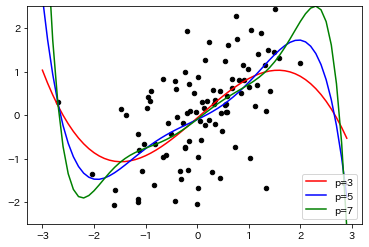

In [42]:
plt.scatter(x, y, s = 20, c = 'black')   # define plot area
plt.ylim(-2.5, 2.5)                      # set y axis limit
x_seq = np.arange(-3, 3, 0.1)            # generate data for x axis by 0.1 interval

for i in range(m):                                 # loop for each polinomial dimensions 3, 5 and 7
    p = p_set[i]                                   # pick the number of dimension 'p' from list 'p_set'
    X = np.ones([n, 1])                            # set the first culumn of data matrix to 1, this means first column relate to intercept
    for j in range(1, p+1):                        # loop for calculate polinomial for each data and form matrix
        xx = np.array(x ** j).reshape((n, 1))      # xx is column for data matrix
        X = np.hstack((X, xx))                     # add column to X
        # print(X)
    beta = np.linalg.inv(X.T @ X) @ X.T @ y        # estimate beta by OLS
    
    def f(u):
        return g(beta, u)
    plt.plot(x_seq, f(x_seq), c = col_set[i], label = 'p={}'.format(p))
    
plt.legend(loc=('lower right'))

# try another way
1. I think data generation part needs not to be changed
1. function g needs to be changed because we can refactor by matrix calculation
1. beta estimation part needs to be changed with same reason above

In [11]:
# data generation : not changed
n = 100                       # define sample size 
x = randn(n)                  # generate random number following standard normal distribution
y = np.sin(x) + randn(n)      # convert x by sin function and add error term

m = 3                                 # number of kind of polinomials
p_set = [3,5,7]                       # the list of dimensions for each polinomials
col_set = ['red', 'blue', 'green']    # define color for each polinomials in line chart

In [39]:
# calculation check for function g : refactor by matrix calculation
print(x)
beta = np.array([1,1,1,1])
X = np.array([x ** i for i in range(4)]).T
S = X @ beta
print(X)
print(X @ beta)

[-1.59237026 -0.24557861  0.88510038 -0.00712529  1.02794265  0.77268421
  1.22825936  1.49238842  0.05103977  0.54621867 -0.06984497  0.58406021
  0.18943335 -0.19352657 -0.89084215  0.09184173 -0.40772419 -0.51022197
  1.30906973 -0.39512442 -1.0787098  -0.84031452 -0.19289498 -0.03037978
  0.74040214  1.04467043 -2.70730661 -1.1422547   1.50493793  1.11149023
 -1.4744623  -0.31088257 -1.60810323 -1.12348603  0.48906064 -0.26565923
  0.98152999  1.57877009  0.85402913  0.56125692 -0.95267624  0.81668153
  0.74363529 -0.42148651 -1.02849543  0.02101294  0.44507647  0.00699163
 -0.60979236  0.00654398 -1.13881658 -0.15573363 -0.55646852  0.14619289
  0.08159451 -0.178036   -1.19344702  0.59068128  0.29874449 -0.33318349
  0.14478142  0.58350557 -0.24327136 -0.23816224  1.41620624  0.34169604
  0.68403862  0.13921437  1.16140129  0.4366363   2.04200134 -0.97722367
 -0.1311444  -1.14182289 -0.81911871  0.45640351  2.85044108  1.17457182
 -0.42431105 -0.9229933   0.32825684  0.29176757 -0

In [40]:
# define function g : calculate polinomial
def g(beta, u):                      # arguments beta : coefficients, u : data
    X = np.array([u ** i for i in range(p+1)]).T
    S = X @ beta
    return S

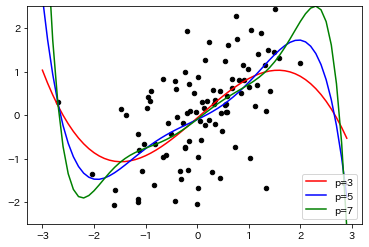

In [43]:
plt.scatter(x, y, s = 20, c = 'black')   # define plot area
plt.ylim(-2.5, 2.5)                      # set y axis limit
x_seq = np.arange(-3, 3, 0.1)            # generate data for x axis by 0.1 interval

for i in range(m):                                 # loop for each polinomial dimensions 3, 5 and 7
    p = p_set[i]                                   # pick the number of dimension 'p' from list 'p_set'
    X = np.array([x ** i for i in range(p+1)]).T   # refactor by matrix calculation
    beta = np.linalg.inv(X.T @ X) @ X.T @ y        # estimate beta by OLS
    
    def f(u):
        return g(beta, u)
    plt.plot(x_seq, f(x_seq), c = col_set[i], label = 'p={}'.format(p))
    
plt.legend(loc=('lower right'))